In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path
#insert

In [6]:
sys.path.insert(0,r"C:\Users\Karryvrcs\Desktop\datamining\env\.venv\Lib\site-packages")

In [536]:
train_set = pd.read_csv("train.csv", dtype={"Class": "int"}, index_col="id")
test_set = pd.read_csv("test.csv")

train_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


## Exploratory data analysis

In [464]:
eda_train = train_set.copy()
eda_test = test_set.copy()

### 1. Time

Conclusion: Fraudulent transactions are significantly more likely to occur at midnight.

Firstly, I split the Time into day and hour. The training set and the test set include different times.

Then, I calculate the percentage of fraudulent transactions on Day 0 and Day 1 (Train_set). The fraud transaction rate on the DAY 1 is higher than on the DAY 0.

In [465]:
eda_train["day"] = eda_train["Time"] // (86400)
eda_train["hour"] = (eda_train["Time"] % (86400)) // 3600

eda_test["day"] = eda_test["Time"] // (86400)
eda_test["hour"] = (eda_test["Time"] % (86400)) // 3600


for i in range(0, 2):
    result = eda_train[eda_train["day"] == i]
    print("DAY", i, np.mean(result["Class"]))

DAY 0 0.0019280305582477727
DAY 1 0.0037042694569617354


In [466]:
eda_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,day,hour
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0,0.0,0.0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0,0.0,0.0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0,0.0,0.0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0,0.0,0.0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,...,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0,1.0,9.0
219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,...,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0,1.0,9.0
219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,...,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0,1.0,9.0


#### Time slot:

Train_set: 
* Day 0, hour 0 - 23  
* Day 1, hour 0 - 9

Test_set: 
* Day 1, hour 9 - 23

It may because the fraudulent transactions are more likely to occur at midnight.

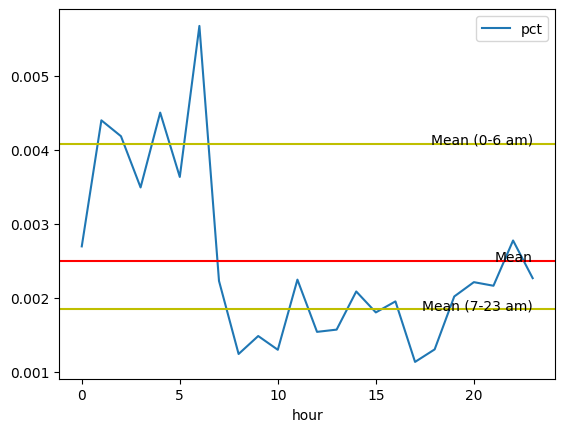

In [535]:
data = {"hour": [], "pct": []}
time = pd.DataFrame(data)

for i in range(0, 24):
    result = eda_train[eda_train["hour"] == i].copy()
    new_row = pd.DataFrame({"hour": [i], "pct": [np.mean(result["Class"])] })
    time = pd.concat([time, new_row])

time.plot(x="hour", y="pct", kind="line")

mean_pct = np.mean(time["pct"])
plt.axhline(y=mean_pct, color="r")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean", ha="right")

mean_pct = np.mean(time[time["hour"] < 7]["pct"])
plt.axhline(y=mean_pct, color="y")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean (0-6 am)", ha="right")

mean_pct = np.mean(time[time["hour"] >= 7]["pct"])
plt.axhline(y=mean_pct, color="y")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean (7-23 am)", ha="right")

plt.show()

Now I Split the training set into DAY 0 and DAY 1.

Day 0

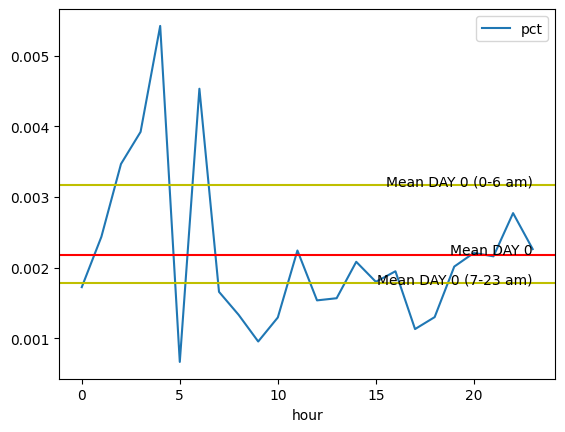

In [468]:
data = {"hour": [], "pct": []}
time = pd.DataFrame(data)

eda_train_day0 = eda_train[eda_train["day"] == 0].copy()

for i in range(0, 24):
    result = eda_train_day0[eda_train_day0["hour"] == i].copy()
    new_row = pd.DataFrame({"hour": [i], "pct": [np.mean(result["Class"])] })
    time = pd.concat([time, new_row])

time.plot(x="hour", y="pct", kind="line")


mean_pct = np.mean(time["pct"])
plt.axhline(y=mean_pct, color="r")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 0", ha="right")


mean_pct = np.mean(time[time["hour"] < 7]["pct"])
plt.axhline(y=mean_pct, color="y")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 0 (0-6 am)", ha="right")

mean_pct = np.mean(time[time["hour"] >= 7]["pct"])
plt.axhline(y=mean_pct, color="y")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 0 (7-23 am)", ha="right")

plt.show()

In [469]:
print("Day 0 average:", np.mean(time["pct"]))

Day 0 average: 0.002185667523478999


Day 1 (0 am - 9 am)

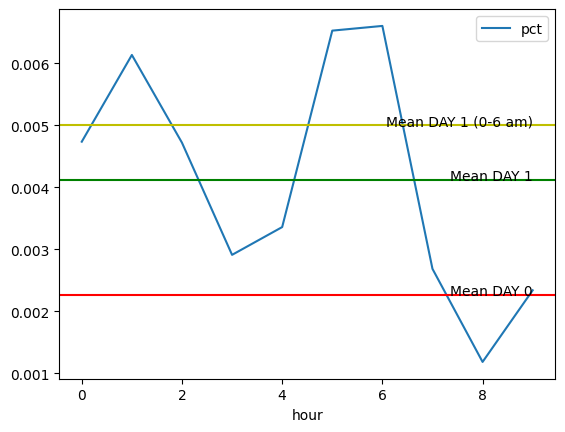

In [470]:
data = {"hour": [], "pct": []}
time = pd.DataFrame(data)

eda_train_day1 = eda_train[eda_train["day"] == 1].copy()

for i in range(0, 10):
    result = eda_train_day1[eda_train_day1["hour"] == i].copy()
    new_row = pd.DataFrame({"hour": [i], "pct": [np.mean(result["Class"])] })
    time = pd.concat([time, new_row])

time.plot(x="hour", y="pct", kind="line")

mean_pct = 0.002263521563021206
plt.axhline(y=mean_pct, color="r")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 0", ha="right")

mean_pct = np.mean(time[time["hour"] < 7]["pct"])
plt.axhline(y=mean_pct, color="y")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 1 (0-6 am)", ha="right")

mean_pct = np.mean(time["pct"])
plt.axhline(y=mean_pct, color="g")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 1", ha="right")

plt.show()

### 2. Outliers (V1-V28)

Conclusion: The outliers of V1-V28 variables are related to fraudulent transactions

(But I don"t know how to handle the outlier)

I define the outlier as two tailed 0.01. 

In [471]:
eda_train2 = train_set.copy()
eda_train2.drop(columns = ["Time", "Class", "Amount"], inplace = True)

In [472]:
# Calculate 0.1% and 99.9% quantiles
quantiles = {}
for col in eda_train2.columns:
    quantiles[col] = (eda_train2[col].quantile(0.005), eda_train2[col].quantile(0.995))

# replace the outlier as 1
def replace_with_binary(x, q):
    if x < q[0] or x > q[1]:
        return 1
    else:
        return 0
    
new_df = pd.DataFrame()

for col in eda_train2.columns:
    new_col = col + "_outlier"
    new_df[new_col] = eda_train2[col].apply(replace_with_binary, q=quantiles[col])

new_df["sum_outlier"] = new_df.sum(axis=1)


new_df["Class"] = train_set["Class"]
pd.DataFrame(new_df).head()

,V1_outlier,V2_outlier,V3_outlier,V4_outlier,V5_outlier,V6_outlier,V7_outlier,V8_outlier,V9_outlier,V10_outlier,...,V21_outlier,V22_outlier,V23_outlier,V24_outlier,V25_outlier,V26_outlier,V27_outlier,V28_outlier,sum_outlier,Class
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Percentage of fraudulent transactions for outlier of each variable 

*Day 0 average: 0.2185%

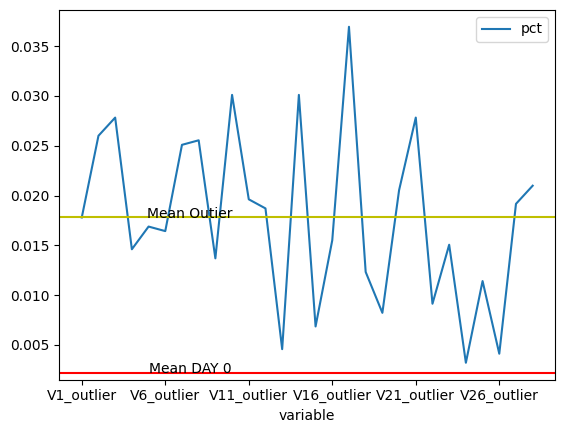

In [473]:
pct_outlier = pd.DataFrame({"variable": [], "pct": []})

for col in new_df.columns:
   outlier = new_df[new_df[col] == 1]
   new_row = pd.DataFrame({"variable": [col], "pct": [outlier["Class"].mean()]  })
   pct_outlier = pd.concat([pct_outlier, new_row])

pct_outlier = pct_outlier[:-2]

pct_outlier.plot(x="variable", y="pct", kind="line")


mean_pct = 0.0021856
plt.axhline(y=mean_pct, color="r")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 0", ha="right")

mean_pct = pct_outlier["pct"].mean()
plt.axhline(y=mean_pct, color="y")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean Outier", ha="right")


plt.show()

In [462]:
for col in new_df.columns:
   outlier = new_df[new_df[col] == 1]
   print(col, round(outlier["Class"].mean() * 100, 2), "%")

V1_outlier 1.78 %
V2_outlier 2.6 %
V3_outlier 2.78 %
V4_outlier 1.46 %
V5_outlier 1.69 %
V6_outlier 1.64 %
V7_outlier 2.51 %
V8_outlier 2.55 %
V9_outlier 1.37 %
V10_outlier 3.01 %
V11_outlier 1.96 %
V12_outlier 1.87 %
V13_outlier 0.46 %
V14_outlier 3.01 %
V15_outlier 0.68 %
V16_outlier 1.55 %
V17_outlier 3.7 %
V18_outlier 1.23 %
V19_outlier 0.82 %
V20_outlier 2.05 %
V21_outlier 2.78 %
V22_outlier 0.91 %
V23_outlier 1.51 %
V24_outlier 0.32 %
V25_outlier 1.14 %
V26_outlier 0.41 %
V27_outlier 1.92 %
V28_outlier 2.1 %
sum_outlier 0.22 %
Class 100.0 %


Filter out the data with the most outliers (99.5% quantile)

In [474]:
pct = new_df["sum_outlier"].quantile(0.995)
pct


6.0

When the transaction data includes a large number of outliers (equals or more than 6), the probability of the transaction being a fraudulent transaction significantly increases, which is 22 times the average.

Therefore, we not only cannot remove outliers, but also pay more attention to outliers.

In [475]:
outlier_ = new_df[new_df["sum_outlier"] >= 6]
print(round(outlier_["Class"].mean()* 100 , 4), "%")


4.8035 %


### 3. Amount

It seems that small amount are more likely to be fraudulent transactions.

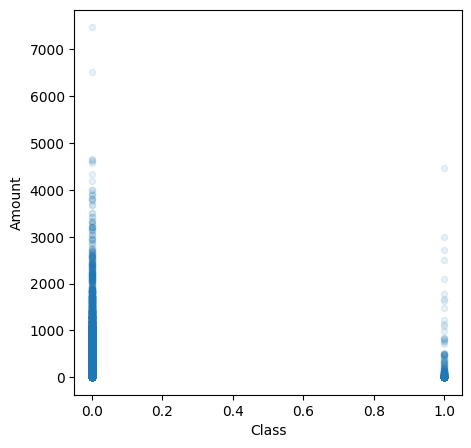

In [477]:
eda_train3 = eda_train.copy()
plot = eda_train3.plot(kind="scatter", x="Class", y="Amount", alpha=0.1, figsize=(5,5))
plt.show()


Fraudulent transactions are twice the average.

But what about the large transactions?

In [534]:
qt1 = eda_train3["Amount"].quantile(0.00)
qt2 = eda_train3["Amount"].quantile(0.05)
print("Amount:[", round(qt1,2), ",",round(qt2,2), "] Fraudulent transactions Pct:", round(np.mean(eda_train3[eda_train3["Amount"] <qt2]["Class"])*100, 4), "%")

qt1 = eda_train3["Amount"].quantile(0.99)
qt2 = eda_train3["Amount"].quantile(1)
print("Amount:[", round(qt1,2), ",",round(qt2,2), "] Fraudulent transactions Pct:", round(np.mean(eda_train3[eda_train3["Amount"] >qt1]["Class"])*100, 4), "%")

qt1 = eda_train3["Amount"].quantile(0.999)
qt2 = eda_train3["Amount"].quantile(1)
print("Amount:[", round(qt1,2), ",",round(qt2,2), "] Fraudulent transactions Pct:", round(np.mean(eda_train3[eda_train3["Amount"] >qt1]["Class"])*100, 4), "%")

qt1 = eda_train3["Amount"].quantile(0.9995)
qt2 = eda_train3["Amount"].quantile(1)
print("Amount:[", round(qt1,2), ",",round(qt2,2), "] Fraudulent transactions Pct:", round(np.mean(eda_train3[eda_train3["Amount"] >qt1]["Class"])*100, 4), "%")

Amount:[ 0.0 , 0.99 ] Fraudulent transactions Pct: 0.5744 %
Amount:[ 665.79 , 7475.0 ] Fraudulent transactions Pct: 0.9124 %
Amount:[ 1736.48 , 7475.0 ] Fraudulent transactions Pct: 2.7273 %
Amount:[ 2249.08 , 7475.0 ] Fraudulent transactions Pct: 3.6364 %


Large transactions seem more likely to be fraudulent transactions.

## 机器学习

In [16]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

## Separate into X and y
train_x = train_set.copy()
train_y = train_set["Class"].copy()
train_x.drop(columns="Class", inplace=True)



方法二：用分类决策树

In [59]:
## [["Amount", "V2", "V3", "V4", "V10", "V14", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V25", "V27", "V28"]]
## Separate into X and y
train_x = train_set.copy()
train_y = train_set["Class"].copy()
train_x.drop(columns="Class", inplace=True)

test_x = test_set.copy()


train_x.drop(columns="Time")

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
id,,,,,,,,,,,,,,,,,,,,,
0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
1,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00
2,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,0.858158,...,-0.195703,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65
219125,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,-0.257933,...,-0.116538,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00
219126,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,-0.136498,...,-0.384830,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79


决策树

In [67]:
new_train = train_set.copy()

In [88]:
np.mean(result["Class"])

0.0027723061209600935

0 0.0026925778506204636
1 0.004395184406650105
2 0.0041803523439832785
3 0.00348866184899078
4 0.0044994375703037125
5 0.0036303630363036304
6 0.005670220004536176
7 0.0022259321090706734
8 0.0012393109431156277
9 0.0014819205690574985
10 0.0012961762799740765
11 0.0022435243728329596
12 0.0015380974917179365
13 0.0015684736790510733
14 0.002083613388896357
15 0.0018006732952321302
16 0.001949648215648046
17 0.0011321257325519446
18 0.0013013420089467262
19 0.0020161290322580645
20 0.002209513906940473
21 0.002160881081834658
22 0.0027723061209600935
23 0.0022635215630212057


在测试集上预测

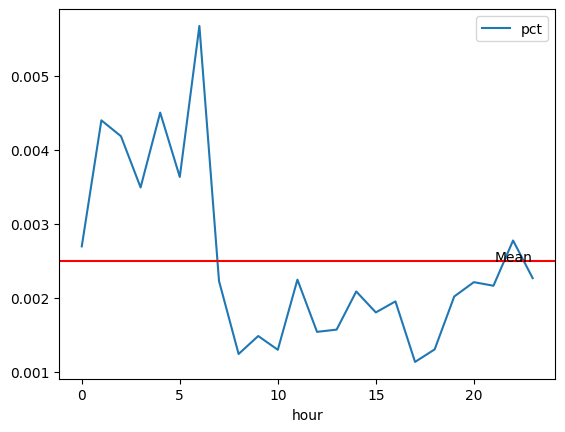

In [50]:
from sklearn.tree import DecisionTreeClassifier

best_tree_classifier = DecisionTreeClassifier(
    random_state=25,
    max_depth=12,
    min_samples_leaf = 2000,
    class_weight={0: 1, 1: 200},
)


In [52]:
best_tree_classifier.fit(train_x, train_y)

DecisionTreeClassifier(class_weight={0: 1, 1: 200}, max_depth=12,
                       min_samples_leaf=2000, random_state=25)

In [51]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(best_tree_classifier, train_x, train_y, cv=5, method="predict")
roc_auc_score(train_y, y_scores)

0.6291022982199974

随机森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(
    random_state=25,
    max_depth=12,
    n_estimators=200,
    min_samples_leaf= 1000,
    class_weight= "balanced",
)

random_forest_classifier.fit(train_x, train_y)


In [ ]:
y_scores = cross_val_predict(random_forest_classifier, train_x, train_y, cv=5, method="predict")
roc_auc_score(train_y, y_scores)

0.6856499473337991

支持向量机SVM

In [743]:
from sklearn.svm import SVC

SVC_classifier = SVC(
    kernel="linear",
    probability=True,
    class_weight= "balanced",
)

SVC_classifier.fit(train_x, train_y)


In [ ]:
y_scores = cross_val_predict(SVC_classifier, train_x, train_y, cv=5, method="predict")
roc_auc_score(train_y, y_scores)

调参

In [ ]:

tree_classifier = DecisionTreeClassifier(
    random_state=25,
)

from sklearn.model_selection import GridSearchCV

parameter_grid = {
    "max_depth": [8, 10, 12, 14],
    "min_samples_leaf": [600, 800, 1000, 1200],
}

grid_search = GridSearchCV(tree_classifier, parameter_grid, cv=3,
                           scoring="roc_auc",
                           return_train_score=True)

grid_search.fit(train_x, train_y)

grid_search.best_estimator_

grid_search_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_results["mean_test_score"], grid_search_results["params"]):
    print(mean_score, params)

在测试集上预测

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
id,,,,,,,,,,,,,,,,,,,,,
219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,-0.230126,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,1.068183,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,-1.177858,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,2.079398,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,-0.281749,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365211,172789.0,-0.661834,-0.622980,0.735580,-0.554067,0.869889,-0.389502,0.161226,0.069945,0.698829,...,0.262408,-0.046068,-0.425692,0.253833,-1.076331,-0.999877,0.161938,0.149243,0.279708,94.81
365212,172789.0,-0.098889,0.761900,0.340012,-0.589546,0.717091,-0.262765,0.726272,-0.070608,0.095958,...,0.064640,0.441215,1.284819,-0.141790,0.646930,-0.419964,-0.561426,0.326700,0.255166,24.99
365213,172789.0,-1.487918,1.769142,0.551671,0.361566,0.056347,0.084844,0.567545,-0.059899,0.331706,...,0.792736,0.163500,1.287079,-0.186955,-0.349847,-0.161724,-0.213933,0.392745,0.070938,29.99


In [53]:
# 在测试集上预测，并输出概率
y_pred_proba = best_tree_classifier.predict_proba(test_x)

submission = test_set.copy()
submission["Class"] = y_pred_proba[:, 1]
submission = submission[["id", "Class"]]

submission.to_csv("output.csv", index=False)

写入CSV

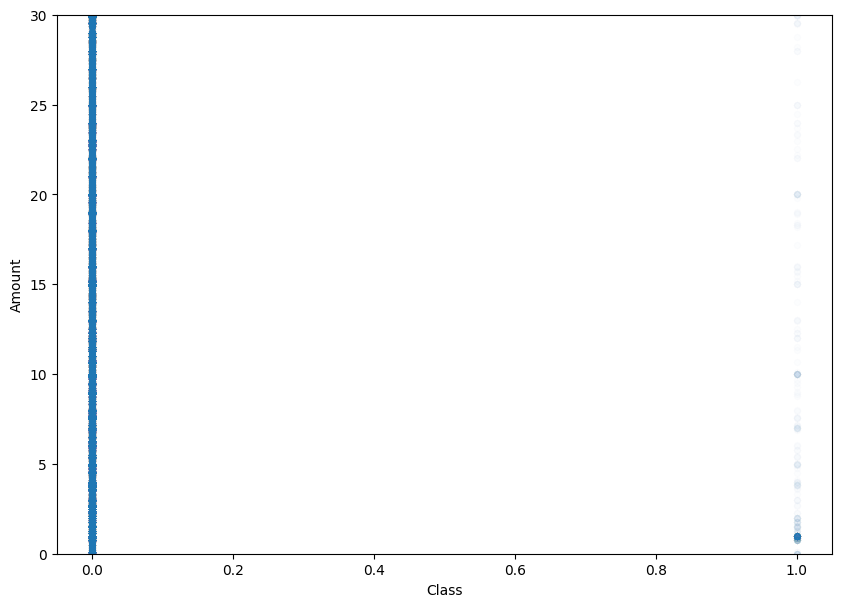

In [617]:
plot = train_set.plot(kind="scatter", x="Class", y="Amount", alpha=0.01, figsize=(10,7))

matplotlib.pyplot.ylim(0, 30)
matplotlib.pyplot.show()